# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [3]:
rent_by_day_mean = df['count'].resample('ME').sum()

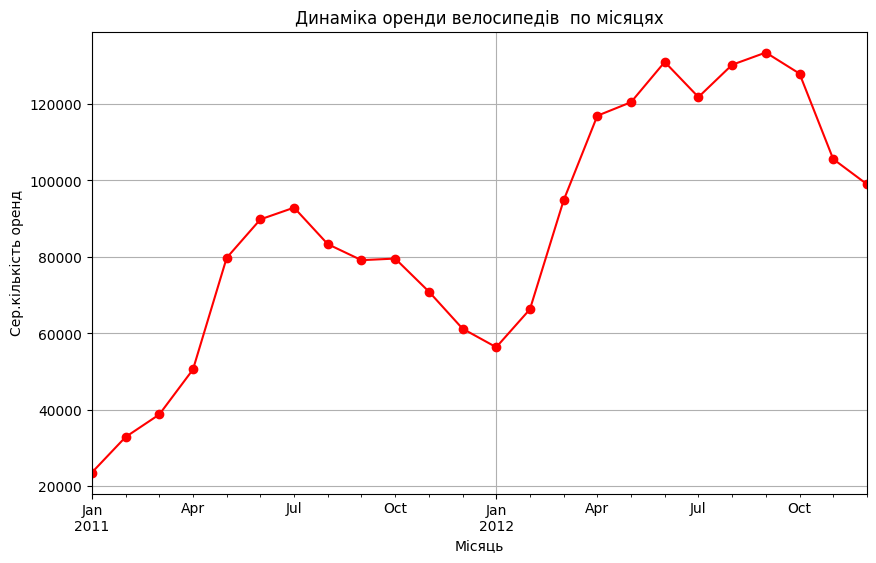

In [4]:
# rent_by_day_mean = df.groupby(['month'])['count'].mean()

## створення з пандас
rent_by_day_mean.plot(
    marker='o',
    figsize=(10, 6),
    title='Динаміка оренди велосипедів  по місяцях',
    xlabel='Місяць',
    ylabel='Сер.кількість оренд',
    color='red',
    grid=True
);

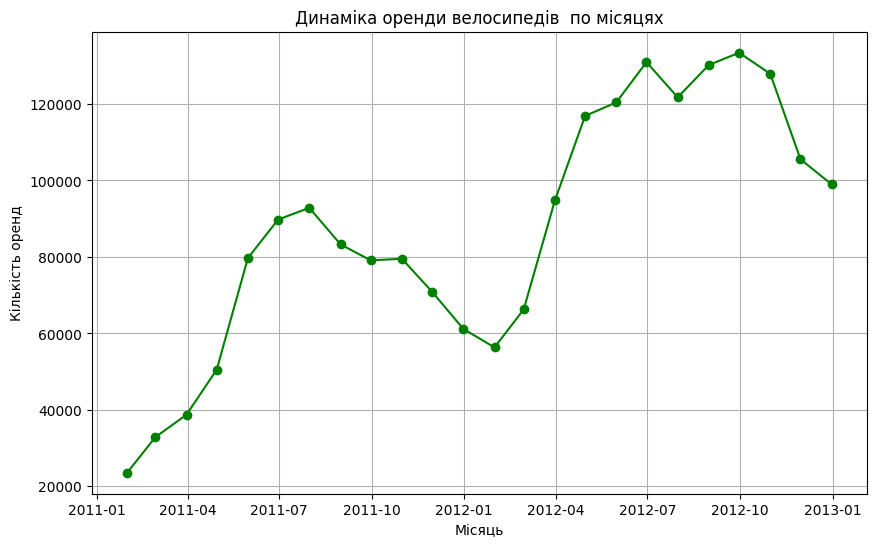

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(rent_by_day_mean, 'o-', color='green')
plt.title('Динаміка оренди велосипедів  по місяцях')
plt.xlabel('Місяць')
plt.ylabel('Кількість оренд')
plt.grid(True);

#### видно незначні відмінності, такі як :
сітка полотна, в панадас горизонтальна і на перехресті років є вертикальна лінія, що зручно, також зручно, що підписані місяці скороченнями назв, а не цифрами (датою), якщо порівнювати довжину коду  то конкретно цей простий графік займає в матплот навіть менше.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [6]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень2

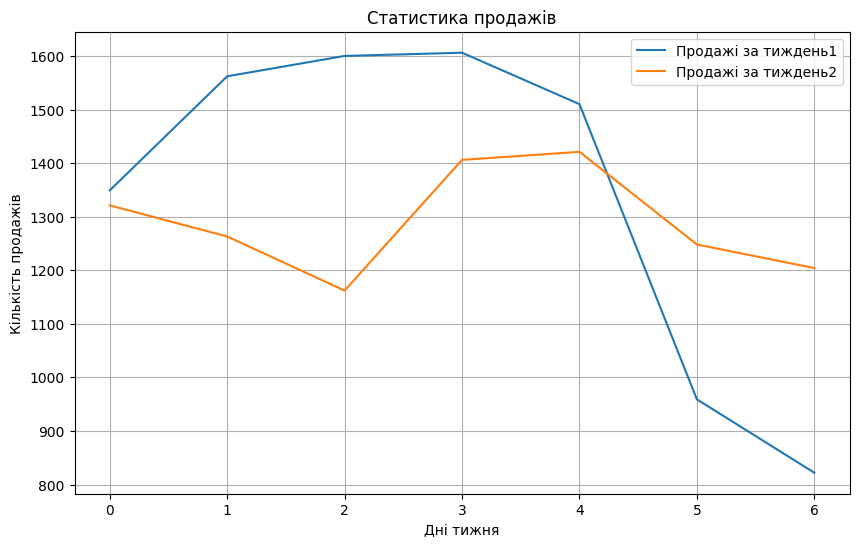

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(sales_week1, label='Продажі за тиждень1')
plt.plot(sales_week2, label='Продажі за тиждень2')


plt.title('Статистика продажів')
plt.ylabel('Кількість продажів')
plt.xlabel('Дні тижня')
plt.grid(True)
plt.legend()
plt.show()

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
   * Другого тижня продажі були стабільніші.
3. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.
   * Розкид данних гарно відслідковувати через стандартне відхилення, чим меньше стд тим стабільніше данні,  кучніші, тож в наступному я порівнюю стд і бачимо що стд 2тижня менше ніж стд 1 тижня.

In [8]:
sales_week1 = pd.Series([120, 130, 110, 125, 115, 118, 123])
sales_week2 = pd.Series([122, 121, 119, 120, 122, 123, 121])

In [9]:
sales_week2.std() < sales_week1.std()

np.True_

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

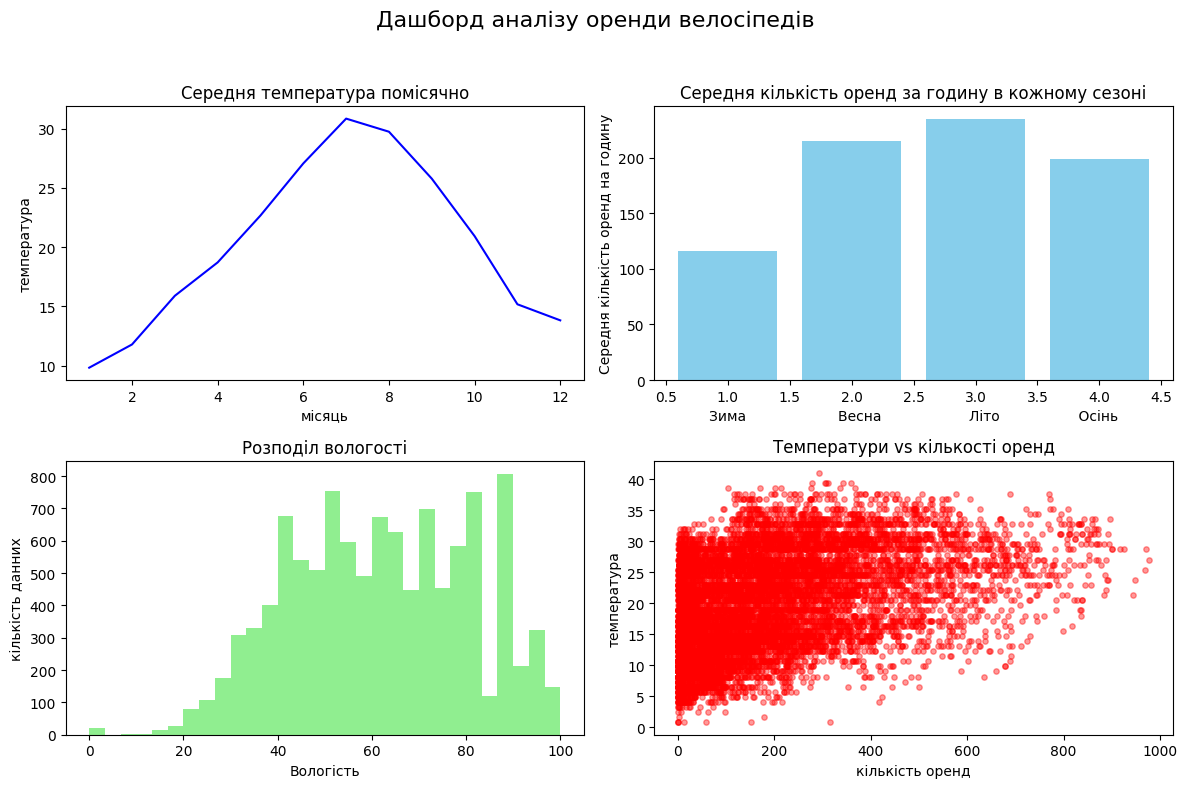

In [10]:

# Дані
a = df.groupby(['month'])['temp'].mean() # середня температура помісячно
b = df.groupby('season')['count'].mean() # Середня кількість оренд за годину в кожному сезоні

plt.figure(figsize=(12, 8))

# Лінійний графік

plt.subplot(2, 2, 1)
plt.plot(a, color='blue')
plt.title('Середня температура помісячно')
plt.xlabel('місяць')
plt.ylabel('температура')

# # Стовпчиковий графік
plt.subplot(2, 2, 2)
plt.bar(b.index, b.values, color = 'skyblue')
plt.title('Середня кількість оренд за годину в кожному сезоні')
plt.xlabel('Зима                     Весна                    Літо                  Осінь')
# plt.xlabel = ('Зима', 'Весна', 'Літо', 'Осінь')
plt.ylabel('Середня кількість оренд на годину')

# Гістограма
plt.subplot(2, 2, 3)
plt.hist(df['humidity'], bins=30, color='lightgreen')
plt.title('Розподіл вологості')
plt.xlabel('Вологість')
plt.ylabel('кількість данних')

# Скатер плот
plt.subplot(2, 2, 4)
plt.scatter(
        df['count'],
        df['temp'],
        color= 'red',
        alpha=0.4,
        s=15
    )
plt.title('Температури vs кількості оренд')
plt.xlabel('кількість оренд')
plt.ylabel('температура')



# Заголовок всієї фігури — треба обійтись без `fig.suptitle()`
plt.suptitle('Дашборд аналізу оренди велосіпедів', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

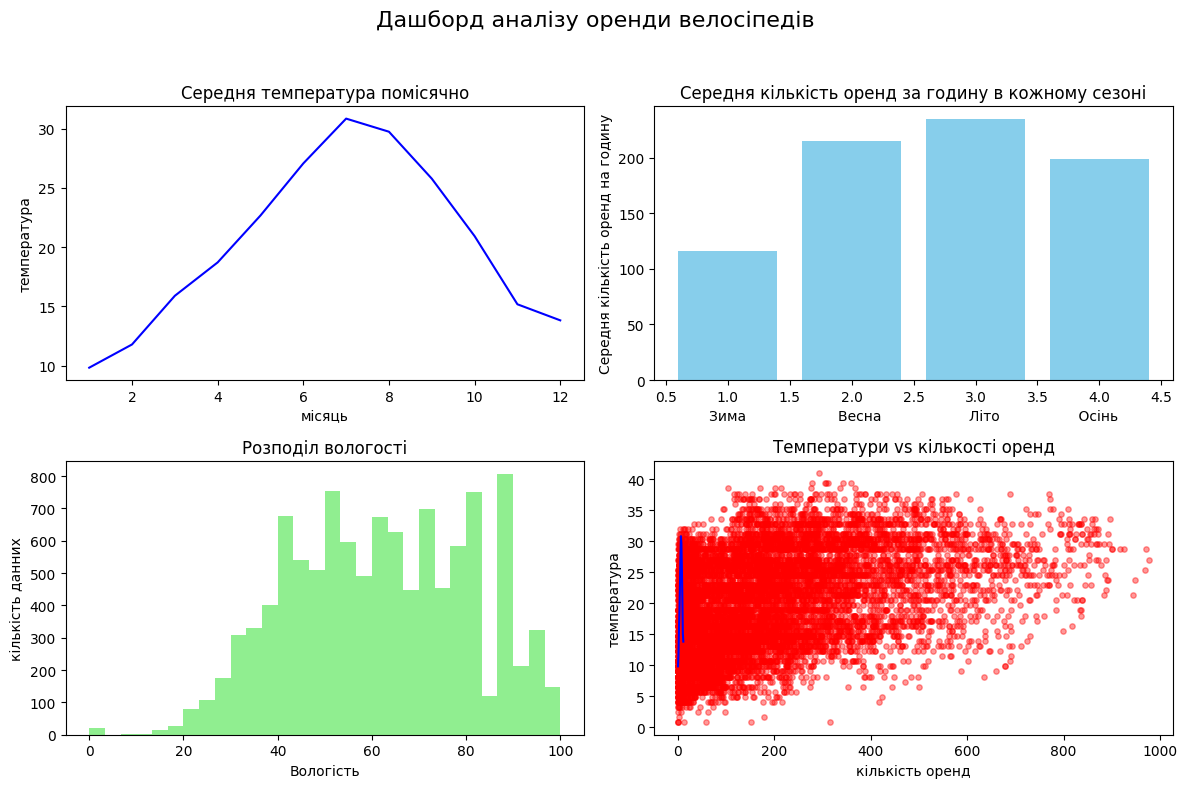

In [11]:
# Дані
a = df.groupby(['month'])['temp'].mean() # середня температура помісячно
b = df.groupby('season')['count'].mean() # Середня кількість оренд за годину в кожному сезоні

# Створюємо 2x2 сітку графіків
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Верхній лівий — лінійний графік
ax[0, 0].plot(a, color='blue')
ax[0, 0].set_title('Середня температура помісячно')
ax[0, 0].set_xlabel('місяць')
ax[0, 0].set_ylabel('температура')
plt.plot(a, color='blue')

# Верхній правий —  Стовпчиковий графік
ax[0, 1].bar(b.index, b.values, color = 'skyblue')
ax[0, 1].set_title('Середня кількість оренд за годину в кожному сезоні')
ax[0, 1].set_xlabel('Зима                     Весна                    Літо                  Осінь')
ax[0, 1].set_ylabel('Середня кількість оренд на годину')

# Нижній лівий — Гістограма
ax[1, 0].hist(df['humidity'], bins=30, color='lightgreen')
ax[1, 0].set_title('Розподіл вологості')
ax[1, 0].set_xlabel('Вологість')
ax[1, 0].set_ylabel('кількість данних')

# Нижній правий — Скатер плот
ax[1, 1].scatter(
        df['count'],
        df['temp'],
        color= 'red',
        alpha=0.4,
        s=15
    )
ax[1, 1].set_title('Температури vs кількості оренд')
ax[1, 1].set_xlabel('кількість оренд')
ax[1, 1].set_ylabel('температура')

# Загальний вигляд
fig.suptitle('Дашборд аналізу оренди велосіпедів', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # залишаємо місце для заголовка
plt.show()

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?
  * Як на мене взагалі не відрізняються, і спосіб прописування не скажу , що дуже довший чи коротший вони мені однакові якісь, не можу сказати , що щось не змогла виконати в одному зі способів, може я шось прогавила.


## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

In [12]:
import matplotlib.dates as mdates

In [13]:
monthly_stats = df['count'].resample('ME').agg(['mean', 'max', 'min'])
monthly_stats


,mean,max,min
datetime,,,
2011-01-31,54.645012,219,1
2011-02-28,73.641256,327,1
2011-03-31,86.849776,332,1
2011-04-30,111.026374,452,1
2011-05-31,174.809211,611,1
2011-06-30,196.877193,638,1
2011-07-31,203.614035,596,1
2011-08-31,182.666667,600,1
2011-09-30,174.622517,628,1


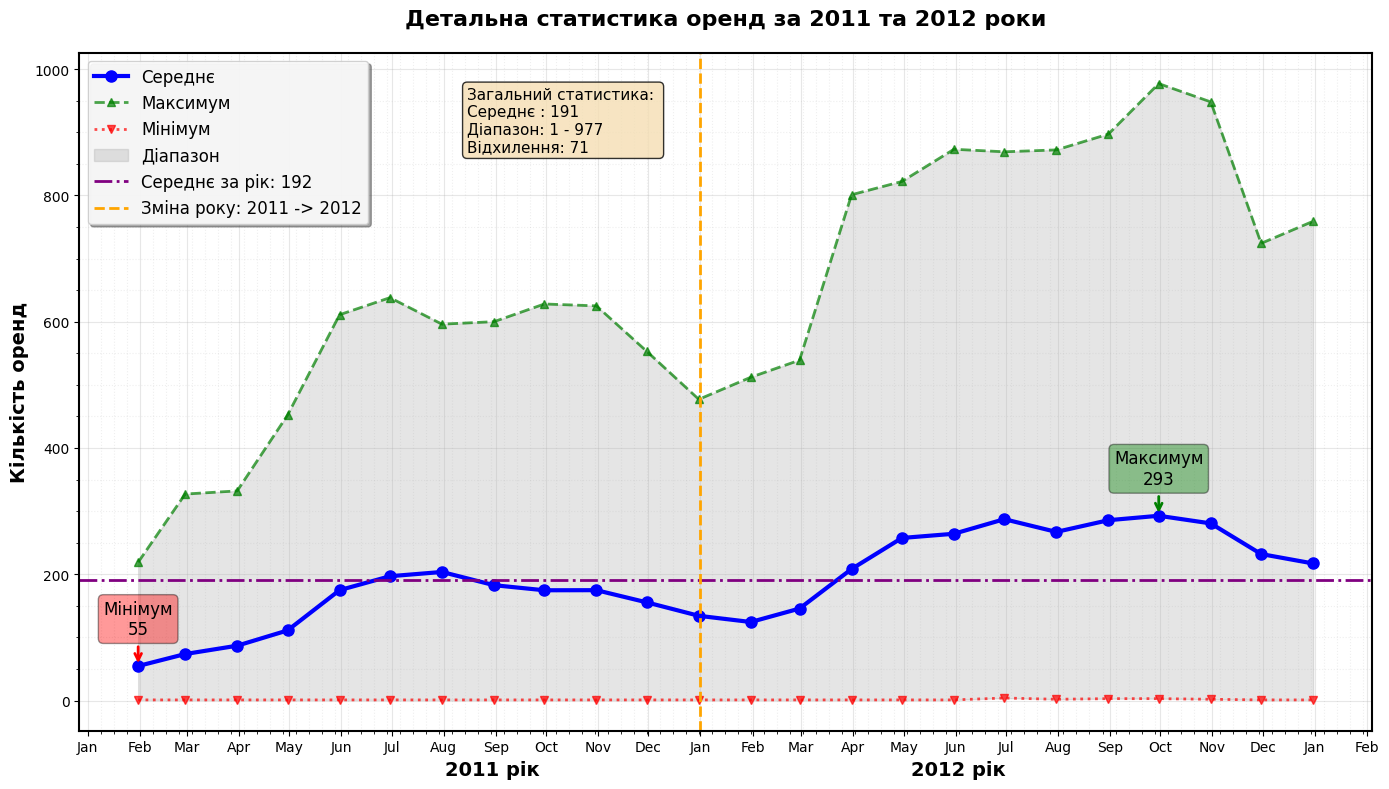

In [28]:
fig, ax = plt.subplots(figsize=(14, 8))

# Малюємо лінії з різними стилями
ax.plot(monthly_stats.index, monthly_stats['mean'], 'b-o', linewidth=3,
        label='Середнє', markersize=8)
ax.plot(monthly_stats.index, monthly_stats['max'], 'g--^', linewidth=2,
        label='Максимум', markersize=6, alpha=0.7)
ax.plot(monthly_stats.index, monthly_stats['min'], 'r:v', linewidth=2,
        label='Мінімум', markersize=6, alpha=0.7)

# Заливка між max та min (правильний синтаксис)
ax.fill_between(monthly_stats.index, monthly_stats['min'], monthly_stats['max'],
                alpha=0.2, color='gray', label='Діапазон')

# Додаємо анотації для екстремальних значень
max_idx = monthly_stats['mean'].idxmax()
max_val = monthly_stats['mean'].max()
ax.annotate(f'Максимум\n{max_val:.0f}',
            xy=(max_idx, max_val), xytext=(max_idx, max_val + 50),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='green', alpha=0.4))


# Додаємо анотації для екстремальних значень
min_idx = monthly_stats['mean'].idxmin()
min_val = monthly_stats['mean'].min()
ax.annotate(f'Мінімум\n{min_val:.0f}',
            xy=(min_idx, min_val), xytext=(min_idx, min_val + 50),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='red', alpha=0.4))

# Налаштування осей
ax.set_xlabel('2011 рік                                                       2012 рік', fontsize=14, fontweight='bold')
ax.set_ylabel('Кількість оренд', fontsize=14, fontweight='bold')
ax.set_title('Детальна статистика оренд за 2011 та 2012 роки',
             fontsize=16, fontweight='bold', pad=20)

# Форматування дат на осі X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Додаємо сітку з різними стилями
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()

# Додаємо середню лінію за весь період
overall_mean = df['count'].mean()
ax.axhline(y=overall_mean, color='purple', linestyle='-.', linewidth=2,
           label=f'Середнє за рік: {overall_mean:.0f}')

    
# Додаємо  лінію роздільник років 
cutoff_date = pd.to_datetime('2012-01-01')
ax.axvline(x=cutoff_date, color='orange', linestyle='--', linewidth=2,
           label='Зміна року: 2011 -> 2012')
    
# Покращуємо легенду
ax.legend(loc='upper left', fontsize=12, frameon=True, shadow=True,
          fancybox=True, framealpha=0.9)

# Додаємо текст з додатковою статистикою
textstr = f'Загальний статистика: \n'
textstr += f'Середнє : {(monthly_stats["mean"]).mean():.0f}\n'
textstr += f'Діапазон: {monthly_stats["min"].min():.0f} - {monthly_stats["max"].max():.0f}\n'
textstr += f'Відхилення: {monthly_stats['mean'].std():.0f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.3, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# Налаштування рамки
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()

**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
   * Покращую сприйняття графіка, одразу акцентує увагу на важливих показниках. Виводить значення цих показників.
2. Для чого використовується fill_between()?
   * Для створення площадної фігури між двома і більше лініями на графіку , що візуально підкреслює сприйняття даних.
3. Як текстовий блок допомагає в інтерпретації даних?
   * Надає додаткові відомості про данні, пояснення деяких значень, при цьому сам графік не перевантажений , або ж виведені значення які важко сприйняти візуально, обрахувати (як в нас : відхилення, і середнє середнього)